In [217]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
import warnings
warnings.simplefilter('ignore')

In [2]:
with open('Все идет по плану.txt', 'r', encoding='utf-8') as file:
    file = file.read()

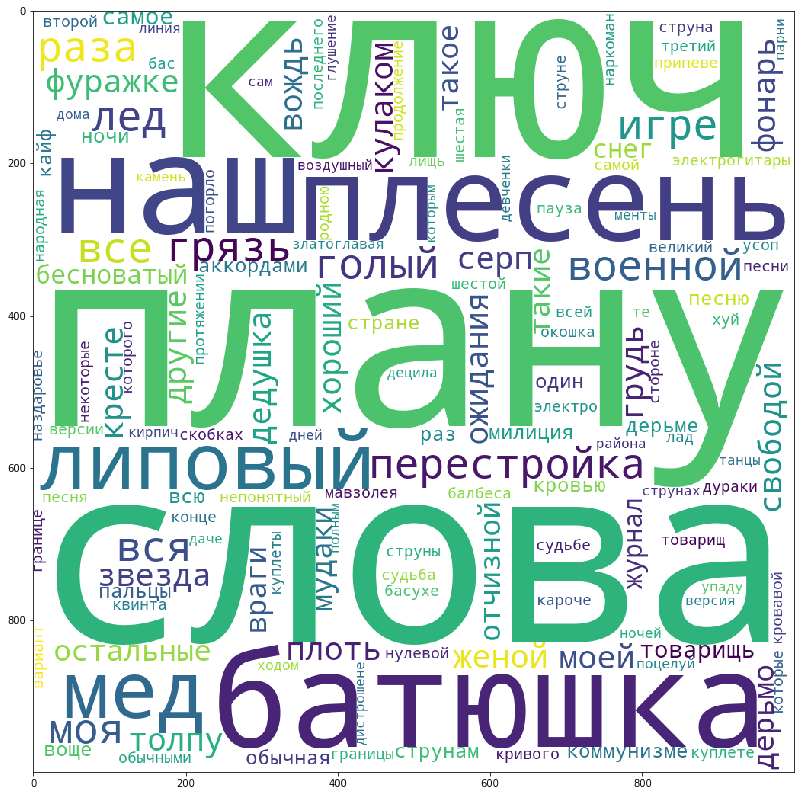

In [3]:
from nltk import word_tokenize
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import pymorphy2
morph = pymorphy2.MorphAnalyzer()

a = ord('а')
russian = ''.join([chr(i) for i in range(a, a+32)])

words = word_tokenize(file)

russian_words = []
for word in words:
    flag = True
    for char in word:
        if char not in russian:
            flag = False
            break
    if flag:
        russian_words.append(word)

russian_words = [word for word in russian_words
                 if ('NOUN' in morph.parse(word)[0].tag) or
                    ('ADJF' in morph.parse(word)[0].tag)]

cloud = Counter(russian_words)

stopwords = set(STOPWORDS)
cloud = ' '.join(cloud)
wordcloud = WordCloud(width = 1000, height = 1000, 
                      stopwords = stopwords, 
                      min_font_size = 8,background_color='white'
                      ).generate(cloud)


plt.figure(figsize = (14, 14)) 
plt.imshow(wordcloud)
pass

In [479]:
import random
import importlib as imp

from algorithm import naive
from algorithm import rabin_karp
from algorithm import boyer_moore_horspool
from algorithm import knuth_morris_pratt
from utils import tools

tools                = imp.reload(tools) 
rabin_karp           = imp.reload(rabin_karp) 
naive                = imp.reload(naive) 
boyer_moore_horspool = imp.reload(boyer_moore_horspool)
knuth_morris_pratt   = imp.reload(knuth_morris_pratt)

len_candidate = 3
len_reference = 150
dictionary    = ['a', 'b', 'c', 'd']

reference = tools.gen_random_string(dictionary, len_reference)
candidate = tools.gen_random_string(dictionary, len_candidate)

print('Reference: {}'.format(reference))
print('Candidate: {}'.format(candidate))

alg = knuth_morris_pratt.KnuthMorrisPratt(reference)
# alg = boyer_moore_horspool.BoyerMooreHorspool(reference)
# alg = rabin_karp.RabinKarp(reference)
# alg = naive.BruteForce(reference)
alg.set_candidate(candidate)
offset_lst = alg.search(multiple_search=True)

print('Indexes:   {}'.format(offset_lst))

reference = list(reference)
i = 0 
for offset in offset_lst:
    ofst = offset + i
    reference.insert(ofst, '_')
    for i_char in range(len_candidate):
        reference[ofst + i_char + 1] = reference[ofst + i_char + 1].upper()
    reference.insert(ofst + len_candidate + 1, '_')
    i += 2
reference = ''.join(reference)
print('Result:    {}'.format(reference))

Reference: bdbacabcbbaddcccdcbbabdaaaaaacbcdadbcdcdccadddcbddcbcddbccaccbcbcdacbacddccbcdbdbaccbccddcbcddacccddbddcbcacacabbabbaaacbcbdddaddabcbdbdbccdcaabacdbcd
Candidate: bac
Indexes:   [2, 68, 80, 143]
Result:    bd_BAC_abcbbaddcccdcbbabdaaaaaacbcdadbcdcdccadddcbddcbcddbccaccbcbcdac_BAC_ddccbcdbd_BAC_cbccddcbcddacccddbddcbcacacabbabbaaacbcbdddaddabcbdbdbccdcaa_BAC_dbcd


In [480]:
%%time
from utils import tools
tools = imp.reload(tools)

algorithms     = [naive.BruteForce,
                  rabin_karp.RabinKarp, 
                  boyer_moore_horspool.BoyerMooreHorspool, 
                  knuth_morris_pratt.KnuthMorrisPratt
                 ]
set_params     = [{}, 
                  {'d': 27, 'q': 1247}, 
                  {}, 
                  {}
                 ]
reference_len  = np.arange(1000, 50000, 5000).tolist()
dictionary     = ['a', 'b', 'c', 'd', 'l', 'r']
n_observations = 3
coef           = 0.42


info_df = tools.generate_stat(  algorithms=algorithms,
                                set_params=set_params,
                                gen_string=tools.gen_random_string,
                                dictionary=dictionary,
                                reference_len=reference_len,
                                candidate_len=[round(rlen * coef) for rlen in  reference_len],
                                n_observations=n_observations,
                                multiple_search=False)

Wall time: 2.08 s


In [481]:
stat_df         = info_df.groupby(['algorithm', 'reference_len']).agg({'execution':['mean','std']})
stat_df.columns = ['execution mean', 'execution std']
stat_df         = stat_df.reset_index()

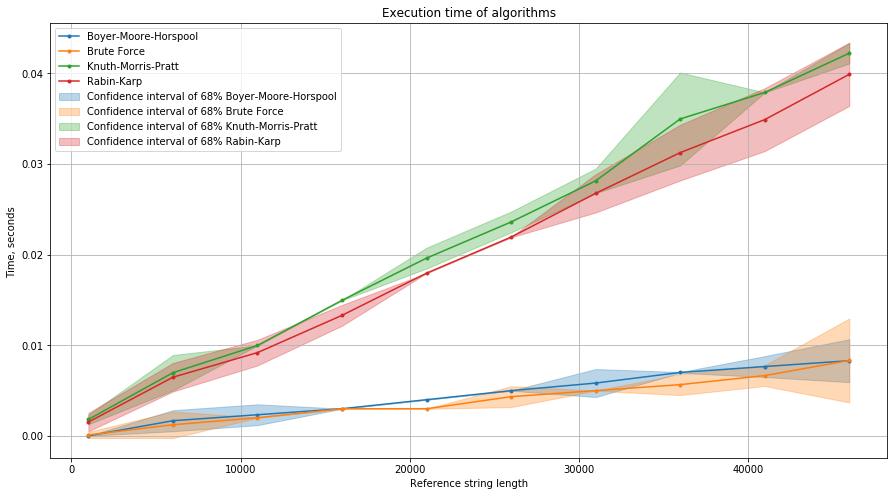

In [482]:
tools = imp.reload(tools)
tools.get_plots(stat_df, figsize=(15, 8))

In [483]:
import os
PATH_TO_BENCHMARKS = './benchmarks/'
all_files = os.listdir(PATH_TO_BENCHMARKS)

In [484]:
names     = ['bad_w', 'bad_t', 'good_w', 'good_t']
info_file = {key:[] for key in names}

for n in names:
    for l in all_files:
        if (l.startswith(n)):
            info_file[n].append(l)

In [485]:
info_file

{'bad_w': ['bad_w_1.txt', 'bad_w_2.txt', 'bad_w_3.txt', 'bad_w_4.txt'],
 'bad_t': ['bad_t_1.txt', 'bad_t_2.txt', 'bad_t_3.txt', 'bad_t_4.txt'],
 'good_w': ['good_w_1.txt', 'good_w_2.txt', 'good_w_3.txt', 'good_w_4.txt'],
 'good_t': ['good_t_1.txt', 'good_t_2.txt', 'good_t_3.txt', 'good_t_4.txt']}

In [503]:
tools = imp.reload(tools)


algorithms     = [naive.BruteForce,
                  rabin_karp.RabinKarp, 
                  boyer_moore_horspool.BoyerMooreHorspool, 
                  knuth_morris_pratt.KnuthMorrisPratt]
set_params     = [{}, {'d': 59, 'q': 13}, {},{}]


info_df_good_benchmarks = tools.generate_stat_for_benchmarks(   algorithms=algorithms,
                                                                set_params=set_params,
                                                                files_w   = info_file['good_w'],
                                                                files_t   = info_file['good_t'],
                                                                path_to_benchmarks = PATH_TO_BENCHMARKS,
                                                                n_observations=5,
                                                                multiple_search=False
                                                             )

In [504]:
stat_df_benchmarks = info_df_good_benchmarks.groupby(['filename', 'algorithm']).agg({'execution':['mean','std'],
                                                                                    'n_operations': 'mean',
                                                                                    'reference_len': 'last'})
stat_df_benchmarks.columns = [ 'execution mean', 'execution std', 'operations', 'reference_len']
print(np.around(stat_df_benchmarks[[ 'execution mean', 'execution std', 'operations']], 4).reset_index().to_markdown())

|    | filename     | algorithm            |   execution mean |   execution std |   operations |
|---:|:-------------|:---------------------|-----------------:|----------------:|-------------:|
|  0 | good_t_1.txt | Boyer-Moore-Horspool |           0.0002 |          0.0004 |           88 |
|  1 | good_t_1.txt | Brute Force          |           0.0002 |          0.0004 |           34 |
|  2 | good_t_1.txt | Knuth-Morris-Pratt   |           0.0007 |          0.0007 |         1233 |
|  3 | good_t_1.txt | Rabin-Karp           |           0.0012 |          0.0004 |          674 |
|  4 | good_t_2.txt | Boyer-Moore-Horspool |           0.0002 |          0.0004 |          124 |
|  5 | good_t_2.txt | Brute Force          |           0.0002 |          0.0004 |           85 |
|  6 | good_t_2.txt | Knuth-Morris-Pratt   |           0.0006 |          0.0005 |         1390 |
|  7 | good_t_2.txt | Rabin-Karp           |           0.001  |          0.0007 |          733 |
|  8 | good_t_3.txt | Boyer-Mo

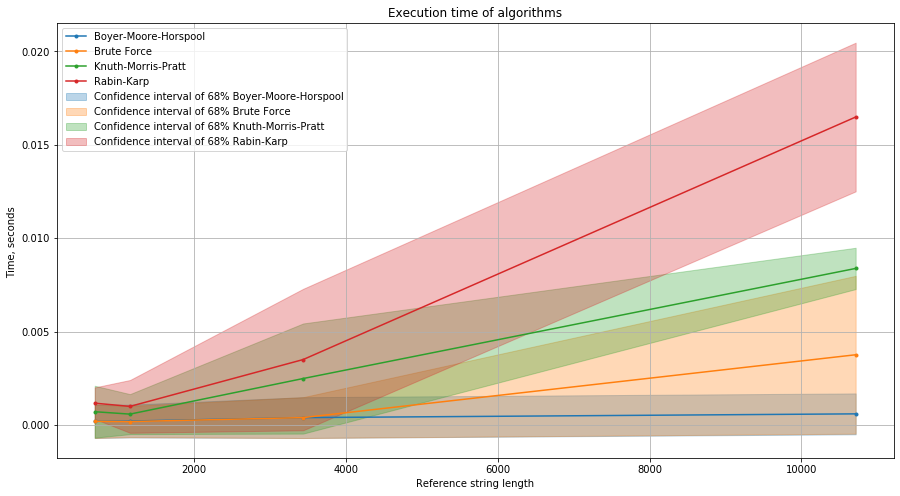

In [505]:
tools = imp.reload(tools)
tools.get_plots(stat_df_benchmarks.reset_index(), figsize=(15, 8))

In [506]:
tools = imp.reload(tools)


algorithms     = [naive.BruteForce,
                  rabin_karp.RabinKarp, 
                  boyer_moore_horspool.BoyerMooreHorspool, 
                  knuth_morris_pratt.KnuthMorrisPratt
]

set_params     = [  {},
                    {'d': 2117, 'q': 12}, 
                    {},
                    {}
]
        
info_df_bad_benchmarks = tools.generate_stat_for_benchmarks(algorithms=algorithms,
                                                            set_params=set_params,
                                                            files_w   = info_file['bad_w'],
                                                            files_t   = info_file['bad_t'],
                                                            path_to_benchmarks = PATH_TO_BENCHMARKS,
                                                            n_observations=5,
                                                            multiple_search=False
                                                         )

In [507]:
stat_df_benchmarks = info_df_bad_benchmarks.groupby(['filename', 'algorithm']).agg({'execution':['mean','std'],
                                                                                    'n_operations': 'mean',
                                                                                    'reference_len': 'last'})
stat_df_benchmarks.columns = [ 'execution mean', 'execution std', 'operations', 'reference_len']
print(np.around(stat_df_benchmarks[[ 'execution mean', 'execution std', 'operations']], 4).reset_index().to_markdown())

|    | filename    | algorithm            |   execution mean |   execution std |   operations |
|---:|:------------|:---------------------|-----------------:|----------------:|-------------:|
|  0 | bad_t_1.txt | Boyer-Moore-Horspool |           0      |          0      |           11 |
|  1 | bad_t_1.txt | Brute Force          |           0      |          0      |           10 |
|  2 | bad_t_1.txt | Knuth-Morris-Pratt   |           0      |          0      |           20 |
|  3 | bad_t_1.txt | Rabin-Karp           |           0      |          0      |           11 |
|  4 | bad_t_2.txt | Boyer-Moore-Horspool |           0.0002 |          0.0005 |          101 |
|  5 | bad_t_2.txt | Brute Force          |           0.0004 |          0.0005 |          820 |
|  6 | bad_t_2.txt | Knuth-Morris-Pratt   |           0      |          0      |          208 |
|  7 | bad_t_2.txt | Rabin-Karp           |           0      |          0      |          101 |
|  8 | bad_t_3.txt | Boyer-Moore-Horspoo

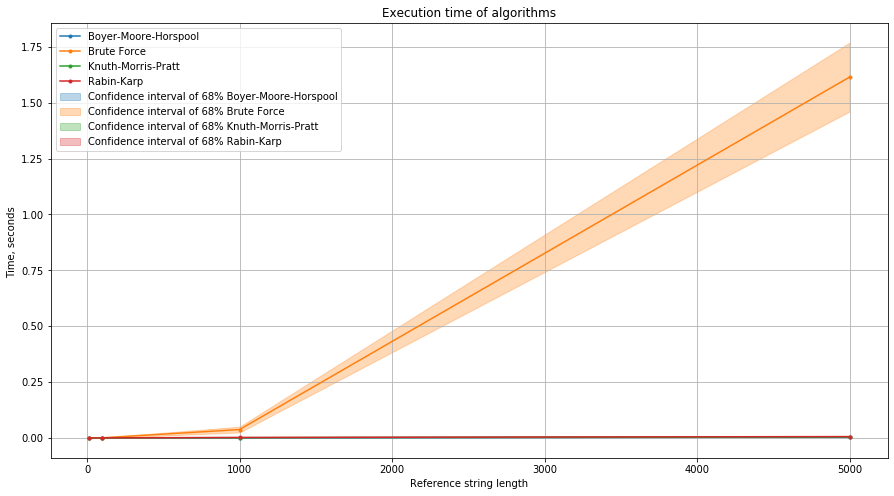

In [509]:
tools = imp.reload(tools)
tools.get_plots(stat_df_benchmarks.reset_index(), figsize=(15, 8))

---

# Лабораторная работа №1. Поиск подстроки в строке

---
Илья Cедунов<br>
Вадим Альперович<br>
17ПМИ<br>

---

### *`goodXXX.txt`*  benchmarks<br>
*Количество наблюдений на каждый алгоритм - 5*<br>
*время представлено в секунда с точность до **4х** знаков после запятой*

|    | Файл    | Алгоритм            |   Время (среднее), сек. |   Время (отклонение), сек. |   Операций |
|---:|:-------------|:---------------------|-----------------:|----------------:|-------------:|
|  0 | good_t_1.txt | Boyer-Moore-Horspool |           0.0002 |          0.0004 |           88 |
|  1 | good_t_1.txt | Brute Force          |           0.0002 |          0.0004 |           34 |
|  2 | good_t_1.txt | Knuth-Morris-Pratt   |           0.0007 |          0.0007 |         1233 |
|  3 | good_t_1.txt | Rabin-Karp           |           0.0012 |          0.0004 |          674 |
|  4 | good_t_2.txt | Boyer-Moore-Horspool |           0.0002 |          0.0004 |          124 |
|  5 | good_t_2.txt | Brute Force          |           0.0002 |          0.0004 |           85 |
|  6 | good_t_2.txt | Knuth-Morris-Pratt   |           0.0006 |          0.0005 |         1390 |
|  7 | good_t_2.txt | Rabin-Karp           |           0.001  |          0.0007 |          733 |
|  8 | good_t_3.txt | Boyer-Moore-Horspool |           0.0004 |          0.0005 |          487 |
|  9 | good_t_3.txt | Brute Force          |           0.0004 |          0.0005 |          445 |
| 10 | good_t_3.txt | Knuth-Morris-Pratt   |           0.0025 |          0.0015 |         4025 |
| 11 | good_t_3.txt | Rabin-Karp           |           0.0035 |          0.0019 |         2169 |
| 12 | good_t_4.txt | Boyer-Moore-Horspool |           0.0006 |          0.0005 |          551 |
| 13 | good_t_4.txt | Brute Force          |           0.0038 |          0.0021 |           92 |
| 14 | good_t_4.txt | Knuth-Morris-Pratt   |           0.0084 |          0.0006 |        19228 |
| 15 | good_t_4.txt | Rabin-Karp           |           0.0165 |          0.002  |        10318 |


![](img/good.png)

---

### *`badXXX.txt`*  benchmarks<br>
*Количество наблюдений на каждый алгоритм - 5*<br>
*время представлено в секунда с точность до **4х** знаков после запятой*



|    | Файл    | Алгоритм            |   Время (среднее), сек. |   Время (отклонение), сек. |   Операций |
|---:|:------------|:---------------------|-----------------:|----------------:|-------------:|
|  0 | bad_t_1.txt | Boyer-Moore-Horspool |           0      |          0      |           11 |
|  1 | bad_t_1.txt | Brute Force          |           0      |          0      |           10 |
|  2 | bad_t_1.txt | Knuth-Morris-Pratt   |           0      |          0      |           20 |
|  3 | bad_t_1.txt | Rabin-Karp           |           0      |          0      |           11 |
|  4 | bad_t_2.txt | Boyer-Moore-Horspool |           0      |          0      |          101 |
|  5 | bad_t_2.txt | Brute Force          |           0.0003 |          0.0004 |          820 |
|  6 | bad_t_2.txt | Knuth-Morris-Pratt   |           0.0002 |          0.0004 |          208 |
|  7 | bad_t_2.txt | Rabin-Karp           |           0.0002 |          0.0004 |          101 |
|  8 | bad_t_3.txt | Boyer-Moore-Horspool |           0.0008 |          0.0008 |         1001 |
|  9 | bad_t_3.txt | Brute Force          |           0.0435 |          0.0142 |        89200 |
| 10 | bad_t_3.txt | Knuth-Morris-Pratt   |           0.0008 |          0.0004 |         2098 |
| 11 | bad_t_3.txt | Rabin-Karp           |           0.0016 |          0.0005 |         1001 |
| 12 | bad_t_4.txt | Boyer-Moore-Horspool |           0.0033 |          0.001  |         5001 |
| 13 | bad_t_4.txt | Brute Force          |           1.8613 |          0.255  |      3997000 |
| 14 | bad_t_4.txt | Knuth-Morris-Pratt   |           0.0058 |          0.0018 |        10998 |
| 15 | bad_t_4.txt | Rabin-Karp           |           0.0067 |          0.0013 |         5001 |


![](img/bad.png)

---